In [1]:
#@pbragamiranda
#date

#carrega as bibliotecas necessárias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import zipfile
import squarify
%matplotlib inline

#define estilo grafico
#plt.style.use('fivethirtyeight')
plt.style.use('dark_background')

#define as opções de display
pd.set_option("display.precision", 2)  # casas decimais
pd.set_option('display.max_colwidth', 60)  #-1 pra ver tudo

#load os dados
zf = zipfile.ZipFile('/home/blackmamba/Documents/analise_dados/viagens_gov_federal/dados/2019_Viagens.zip') 
viagens = pd.read_csv(zf.open("2019_Viagem.csv"), sep=";", encoding="latin1")

In [2]:
#confere se tá tudo ok
viagens.head(3)

,Identificador do processo de viagem,Situação,Código do órgão superior,Nome do órgão superior,Código órgão solicitante,Nome órgão solicitante,CPF viajante,Nome,Cargo,Período - Data de início,Período - Data de fim,Destinos,Motivo,Valor diárias,Valor passagens,Valor outros gastos
0,15045825,Realizada,26000,Ministério da Educação,26291,Fundação Coordenação de Aperfeiçoame...,***.377.624-**,MARINA FERREIRA KITAZONO ANTUNES,NaN,06/02/2019,07/02/2019,Recife/PE,Regresso de bolsista CAPES do exteri...,"0,00","3406,33","0,00"
1,15100682,Realizada,26000,Ministério da Educação,26291,Fundação Coordenação de Aperfeiçoame...,***.831.975-**,JORGE ANDRE DE CARVALHO MENDONCA,NaN,01/02/2019,02/02/2019,Recife/PE,Capacitação PDSE (Programa de Doutor...,"0,00","2925,83","0,00"
2,15114708,Realizada,26000,Ministério da Educação,26291,Fundação Coordenação de Aperfeiçoame...,***.325.718-**,MARCO ANTONIO COUTO JUNIOR,PESQUISADOR EM GEOCIENCIA,01/02/2019,01/02/2019,São Paulo/SP,Capacitação no exterior - PDSE,"0,00","2760,02","0,00"


In [303]:
#confere as colunas presentes e seus respectivos tipos
viagens.dtypes

Identificador do processo de viagem     int64
Situação                               object
Código do órgão superior                int64
Nome do órgão superior                 object
Código órgão solicitante                int64
Nome órgão solicitante                 object
CPF viajante                           object
Nome                                   object
Cargo                                  object
Período - Data de início               object
Período - Data de fim                  object
Destinos                               object
Motivo                                 object
Valor diárias                          object
Valor passagens                        object
Valor outros gastos                    object
dtype: object

In [3]:
#primeiro tratamento dos dados
#transforma vírgula em ponto para possibilitar transformação em float
viagens["Valor passagens"] = viagens["Valor passagens"].str.replace(',' , '.')
viagens["Valor diárias"] = viagens["Valor diárias"].str.replace(',' , '.')
viagens["Valor outros gastos"] = viagens["Valor outros gastos"].str.replace(',' , '.')

In [4]:
#transforma colunas em objeto
viagens["Identificador do processo de viagem"] = viagens["Identificador do processo de viagem"].astype(str)
viagens["Identificador do processo de viagem"] = viagens["Identificador do processo de viagem"].astype(str)

#transforma colunas em número
viagens["Valor passagens"] = viagens["Valor passagens"].astype(float)
viagens["Valor diárias"] = viagens["Valor diárias"].astype(float)
viagens["Valor outros gastos"] = viagens["Valor outros gastos"].astype(float)


#transforma colunas em datetime
viagens['Período - Data de início'] = pd.to_datetime(viagens['Período - Data de início'])
viagens['Período - Data de fim'] = pd.to_datetime(viagens['Período - Data de fim'])


In [5]:
#confere as possibilidades da situação
viagens.Situação.unique()

array(['Realizada', 'Não realizada'], dtype=object)

In [6]:
#seleciona somente as realizadas
viagens_r = viagens[viagens.Situação == "Realizada"]

In [7]:
viagens_r.dtypes

Identificador do processo de viagem            object
Situação                                       object
Código do órgão superior                        int64
Nome do órgão superior                         object
Código órgão solicitante                        int64
Nome órgão solicitante                         object
CPF viajante                                   object
Nome                                           object
Cargo                                          object
Período - Data de início               datetime64[ns]
Período - Data de fim                  datetime64[ns]
Destinos                                       object
Motivo                                         object
Valor diárias                                 float64
Valor passagens                               float64
Valor outros gastos                           float64
dtype: object

In [8]:
#qual foram as top10 passagens mais cara?
viagens_r.nlargest(10, 'Valor passagens')

,Identificador do processo de viagem,Situação,Código do órgão superior,Nome do órgão superior,Código órgão solicitante,Nome órgão solicitante,CPF viajante,Nome,Cargo,Período - Data de início,Período - Data de fim,Destinos,Motivo,Valor diárias,Valor passagens,Valor outros gastos
302646,16154465,Realizada,24000,"Ministério da Ciência, Tecnologia, I...",20402,Agência Espacial Brasileira,***.493.141-**,CARLOS EDUARDO QUINTANILHA VAZ DE OL...,TECNOLOGISTA,2019-09-06,2019-06-16,Londres/Reino Unido,Compor a delegação brasileira que pa...,10761.28,155531.36,0.00
378436,16253216,Realizada,26000,Ministério da Educação,26291,Fundação Coordenação de Aperfeiçoame...,***.902.886-**,LUCIANA MOURAO CERQUEIRA E SILVA,NaN,2019-07-16,2019-07-19,Brasília/DF,Preparatório Seminário Psicologia,879.70,117096.47,0.00
230142,16058716,Realizada,22000,"Ministério da Agricultura, Pecuária ...",22000,"Ministério da Agricultura, Pecuária ...",***.109.606-**,MARA ANDREA BERGAMASCHI,NaN,2019-06-05,2019-05-21,"Tóquio/Japão, Xangai/China, Pequim/C...",Acompanhar e Assessorar a Senhora Mi...,20303.14,50884.81,195.42
204579,16024112,Realizada,22000,"Ministério da Agricultura, Pecuária ...",22000,"Ministério da Agricultura, Pecuária ...",***.694.306-**,TEREZA CRISTINA CORREA DA COSTA DIAS,NaN,2019-06-05,2019-05-21,"São Paulo/SP, Tóquio/Japão, Niigata/...",JAPÃO/Tóquio - Reunião Bilateral com...,21104.95,42225.04,2665.97
124017,15918458,Realizada,36000,Ministério da Saúde,36212,Agência Nacional de Vigilância Sanit...,***.292.440-**,LIGIA LINDNER SCHREINER,ESP EM REGULACAO E VIGILANCIA SANITARIA,2019-07-04,2019-12-04,Buenos Aires/Argentina,Trata-se da LXVIII Reunião do Subgru...,5241.89,36002.21,159.60
177506,15988180,Realizada,52000,Ministério da Defesa,52111,Comando da Aeronáutica,***.680.706-**,GUILHERME ANTONIO MATOS RODRIGUES,NaN,2019-04-21,2019-04-26,Anápolis/GO,PARTICIPAR DAS REUNIÕES DE PDR DA MP...,1163.25,31919.90,1163.25
331719,16192165,Realizada,24000,"Ministério da Ciência, Tecnologia, I...",24000,"Ministério da Ciência, Tecnologia, I...",***.800.728-**,MARCELO MARCOS MORALES,PROFESSOR DO MAGISTERIO SUPERIOR,2019-06-15,2019-06-29,"Paris/França, Viena/Áustria, Abu Dab...",Acompanhar o Exmo. Sr. Ministro Marc...,22748.57,29500.39,0.00
333888,16194989,Realizada,24000,"Ministério da Ciência, Tecnologia, I...",24000,"Ministério da Ciência, Tecnologia, I...",***.983.596-**,VANIA GOMES DA SILVA,ANALISTA EM CIENCIA E TECNOLOGIA,2019-06-15,2019-06-29,"Paris/França, Viena/Áustria, Abu Dab...",Acompanhar e assessorar o ministro d...,21253.39,29500.39,0.00
335878,16197634,Realizada,24000,"Ministério da Ciência, Tecnologia, I...",24000,"Ministério da Ciência, Tecnologia, I...",***.971.638-**,MARCOS CESAR PONTES,NaN,2019-06-15,2019-06-29,"Paris/França, Viena/Áustria, Abu Dab...","Visita oficial a França, Áustria, Em...",22951.80,29500.39,0.00
340635,16204085,Realizada,24000,"Ministério da Ciência, Tecnologia, I...",24000,"Ministério da Ciência, Tecnologia, I...",***.808.648-**,CHRISTIANE GONCALVES CORREA,NaN,2019-06-15,2019-06-29,"Paris/França, Viena/Áustria, Abu Dab...",Acompanhar o Sr. Ministro em visita ...,22951.80,29500.39,0.00


In [9]:
#qual foram as top10 pessoas que mais viagem?
viagens_r.nsmallest(10, 'Valor passagens')

,Identificador do processo de viagem,Situação,Código do órgão superior,Nome do órgão superior,Código órgão solicitante,Nome órgão solicitante,CPF viajante,Nome,Cargo,Período - Data de início,Período - Data de fim,Destinos,Motivo,Valor diárias,Valor passagens,Valor outros gastos
15,15393148,Realizada,26000,Ministério da Educação,26258,Universidade Tecnológica Federal do ...,***.481.279-**,MAUREN LOUISE SGUARIO COELHO DE ANDRADE,PROFESSOR DO MAGISTERIO SUPERIOR,2019-07-01,2019-01-27,Pavia/Itália,Visita técnica para aplicação de nov...,0.00,0.0,0.0
35,15450147,Realizada,55000,Ministério da Cidadania,20411,Instituto do Patrimônio Histórico e ...,***.305.154-**,MARCIA MARIA VIEIRA HAZIN,TECNICO I,2019-01-18,2019-12-02,Lisboa/Portugal,Trata-se de qualificação de proposta...,0.00,0.0,0.0
36,15450427,Realizada,26000,Ministério da Educação,26408,Instituto Federal do Maranhão,***.321.473-**,FRANCISCO ROBERTO BRANDAO FERREIRA,PROFESSOR ENS BASICO TECN TECNOLOGICO,2019-07-02,2019-09-02,"Rosário/MA, Araioses/MA",Visitar as Obras das instalações def...,592.11,0.0,0.0
44,15459776,Realizada,26000,Ministério da Educação,26258,Universidade Tecnológica Federal do ...,***.832.009-**,SIMONE DE ALMEIDA,PROFESSOR ENS BASICO TECN TECNOLOGICO,2019-01-02,2019-02-24,Toronto/Canadá,Realizar curso no período de licença...,0.00,0.0,0.0
80,15507850,Realizada,26000,Ministério da Educação,26352,Fundação Universidade Federal do ABC,***.345.688-**,LUCIANA PEREIRA,PROFESSOR DO MAGISTERIO SUPERIOR,2019-07-01,2019-01-15,Bangalore/Índia,Participação no 7th International C...,0.00,0.0,0.0
87,15521282,Realizada,25000,Ministério da Economia,30203,"Instituto Nacional de Metrologia, Qu...",***.038.959-**,WILSON DE SOUZA MELO JUNIOR,PESQUISADOR-TECNOLOGISTA METR QUALIDADE,2019-01-02,2019-05-05,Berlim/Alemanha,Atuar como Pesquisador visitante a c...,0.00,0.0,0.0
115,15541262,Realizada,25000,Ministério da Economia,30203,"Instituto Nacional de Metrologia, Qu...",***.714.916-**,LEONARDO COSTA RIBEIRO,PESQUISADOR-TECNOLOGISTA METR QUALIDADE,2019-02-01,2019-02-27,Londres/Reino Unido,Desenvolver projeto de pesquisa de '...,0.00,0.0,0.0
117,15544257,Realizada,36000,Ministério da Saúde,36201,Fundação Oswaldo Cruz,***.517.507-**,LEONARDO VILA NOVA CAMARA,ANALISTA DE GESTAO EM SAUDE,2019-02-01,2019-01-31,Lisboa/Portugal,DOUTORAMENTO EM EDUCAÇÃO,0.00,0.0,0.0
119,15544941,Realizada,26000,Ministério da Educação,26242,Universidade Federal de Pernambuco,***.621.844-**,MARCOS ALYSSANDRO SOARES DOS ANJOS,PROFESSOR ENS BASICO TECN TECNOLOGICO,2019-02-20,2019-02-22,Caruaru/PE,Participaração em duas bancas de def...,380.04,0.0,0.0
121,15552264,Realizada,26000,Ministério da Educação,26258,Universidade Tecnológica Federal do ...,***.282.949-**,LUIZ AMILTON PEPPLOW,PROFESSOR ENS BASICO TECN TECNOLOGICO,2019-01-02,2019-03-30,Saint Julians/Malta,Prover qualificação profissional e c...,0.00,0.0,0.0


In [10]:
#agrupa por órgão superior, conta e soma
agrupado = viagens_r.groupby('Nome do órgão superior').agg({'Código do órgão superior' : 'count', 'Valor passagens' : 'sum'}).reset_index()

In [11]:
#exibe resultados em ordem de quem mais gastoucom passagem para quem menos gastou
agrupado["Valor passagens"] = agrupado["Valor passagens"].astype(int)
agrupado.sort_values(by='Valor passagens', ascending=False)

,Nome do órgão superior,Código do órgão superior,Valor passagens
8,Ministério da Educação,138853,65140269
6,Ministério da Defesa,78060,46645725
24,Sem informação,39809,32105064
11,Ministério da Justiça e Segurança Pú...,63277,27848771
13,Ministério da Saúde,29686,20769533
7,Ministério da Economia,55256,19125884
15,Ministério das Relações Exteriores,3199,12366786
10,Ministério da Infraestrutura,13877,12362585
4,"Ministério da Ciência, Tecnologia, I...",8468,10895047
2,"Ministério da Agricultura, Pecuária ...",31631,10483097


In [12]:
#retira Min das Cidades
agrupado.drop(agrupado[agrupado['Nome do órgão superior'] == "Ministério das Cidades"].index, inplace=True)

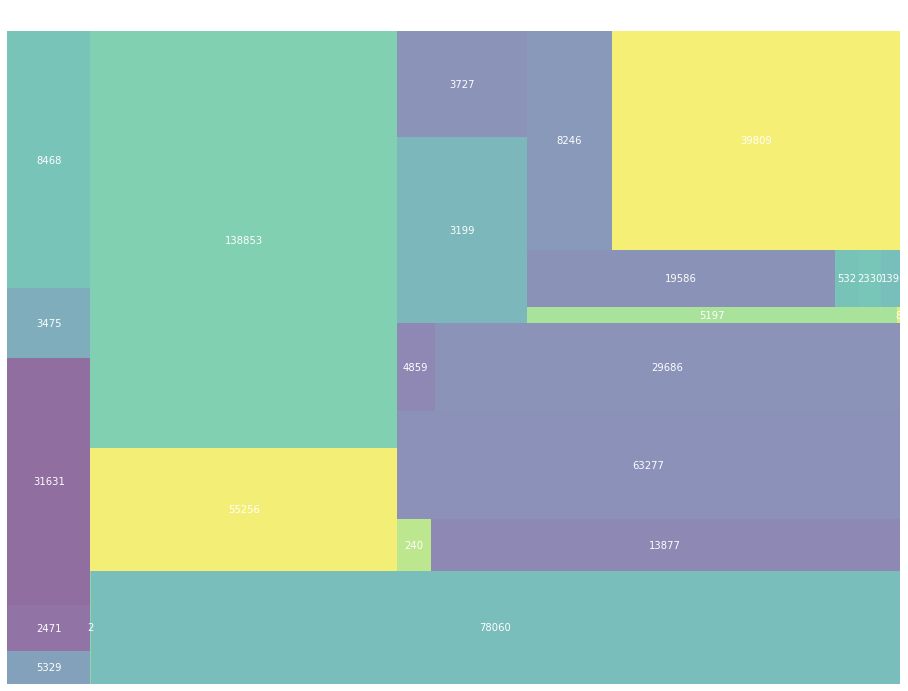

In [40]:
#treemap para visualizar órgãos que mais gastaram
#Utilise matplotlib to scale our goal numbers between the min and max, then assign this scale to our values.

# create a color palette, mapped to these values
cmap = matplotlib.cm.Blues
mini=min(agrupado['Valor passagens'])
maxi=max(agrupado['Valor passagens'])
norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
colors = [cmap(norm(value)) for value in agrupado['Valor passagens']]

#norm = matplotlib.colors.Normalize(vmin=min(agrupado['Valor passagens']), vmax=max(agrupado['Valor passagens'])
#colors = [matplotlib.cm.Blues(norm(value)) for value in agrupado['Valor passagens']]

#Create our plot and resize it.
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 12)

#Use squarify to plot our data, label it and add colours. We add an alpha layer to ensure black labels show through
squarify.plot(sizes=agrupado['Valor passagens'], label=agrupado['Código do órgão superior'], 
              text_kwargs={'fontsize':10}, alpha=.6)
plt.title("Gastos com viagens por órgão",fontsize=23,fontweight="bold")

#Remove our axes and display the plot
plt.axis('off')
plt.show()

Text(0.5, 0, 'Gastos com viagens por órgão')

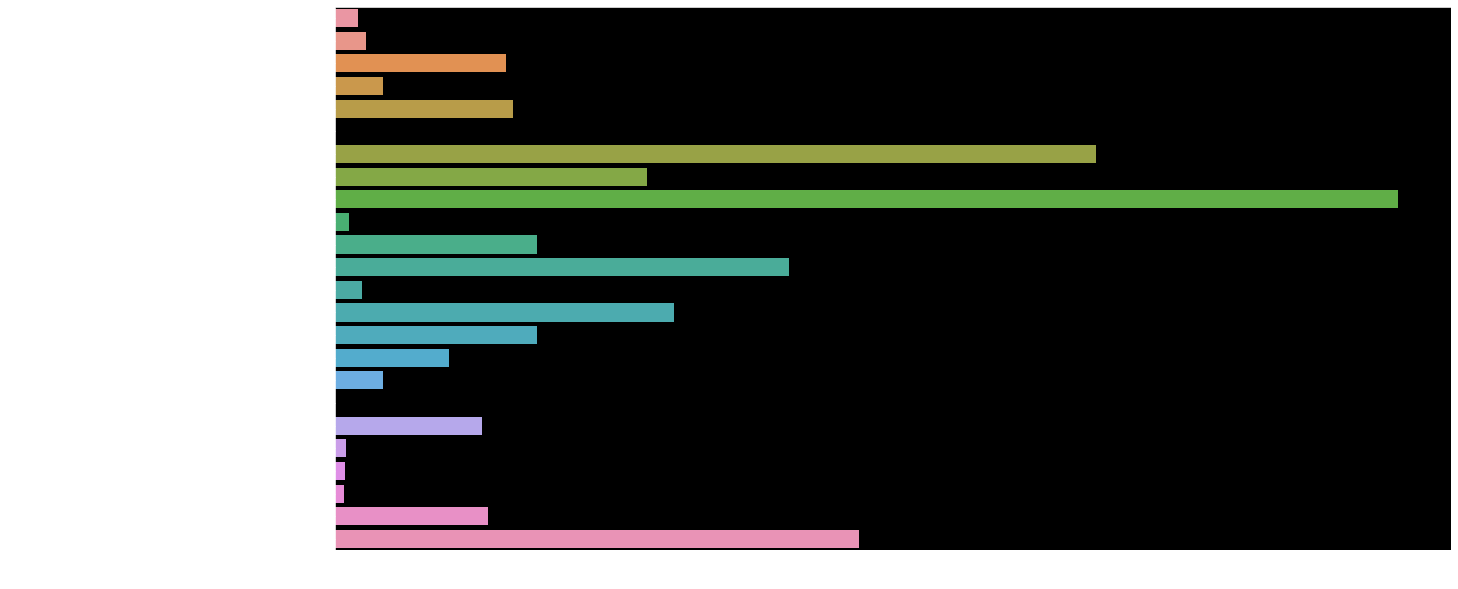

In [17]:
#gráfico em barra para visualizar órgãos que mais gastaram
plt.figure(figsize=(20,10))
ax = sns.barplot(x='Valor passagens', y='Nome do órgão superior', data=agrupado)
ax.set_xlabel('Gastos com viagens por órgão')

In [18]:
#quem foram as pessoas que mais viajaram? 
pessoas = viagens_r.groupby('Nome').agg({'Situação' : 'count', 'Valor passagens' : 'sum'}).reset_index()

In [19]:
#quem foram as pessoas que mais viajaram? 
pessoas.nlargest(10, 'Situação')

,Nome,Situação,Valor passagens
69622,Informações protegidas por sigilo,63759,3.11e+07
121132,PATRICIA TIDORI MIURA,137,0.00e+00
80440,JOSE MILTON NATIVIDADE,118,0.00e+00
16943,ANTONIO TOMAZ PATRONO,116,0.00e+00
133105,ROBERTO CARLOS DE CARVALHO,114,0.00e+00
1106,ADILSON RAIMUNDO XAVIER,109,0.00e+00
16571,ANTONIO MIKIO SAVAMOTO,109,0.00e+00
80774,JOSE RAIMUNDO TIMOTEO,99,0.00e+00
73450,JOAO BATISTA DA SILVA,98,0.00e+00
102619,MARCIO FLAVIO MOL,97,0.00e+00


In [20]:
#exclui "pessoa" informações protegidas por sigilo
pessoas.drop(pessoas[pessoas['Nome'] == "Informações protegidas por sigilo"].index, inplace=True)

In [21]:
#quem foram as pessoas que mais viajaram? 
pessoas.nlargest(10, 'Situação')

,Nome,Situação,Valor passagens
121132,PATRICIA TIDORI MIURA,137,0.0
80440,JOSE MILTON NATIVIDADE,118,0.0
16943,ANTONIO TOMAZ PATRONO,116,0.0
133105,ROBERTO CARLOS DE CARVALHO,114,0.0
1106,ADILSON RAIMUNDO XAVIER,109,0.0
16571,ANTONIO MIKIO SAVAMOTO,109,0.0
80774,JOSE RAIMUNDO TIMOTEO,99,0.0
73450,JOAO BATISTA DA SILVA,98,0.0
102619,MARCIO FLAVIO MOL,97,0.0
117656,NELSON MENDES CARNEIRO,97,0.0


In [22]:
#quem é nossa campeão de viagens?
top = viagens[viagens.Nome == 'PATRICIA TIDORI MIURA']

In [321]:
top

,Identificador do processo de viagem,Situação,Código do órgão superior,Nome do órgão superior,Código órgão solicitante,Nome órgão solicitante,CPF viajante,Nome,Cargo,Período - Data de início,Período - Data de fim,Destinos,Motivo,Valor diárias,Valor passagens,Valor outros gastos
3990,15764612,Realizada,22000,"Ministério da Agricultura, Pecuária ...",22000,"Ministério da Agricultura, Pecuária ...",***.563.948-**,PATRICIA TIDORI MIURA,NaN,2019-08-01,2019-08-01,Holambra/SP,Realizar cobertura de abate ante e p...,0.00,0.0,0.0
4371,15765140,Realizada,22000,"Ministério da Agricultura, Pecuária ...",22000,"Ministério da Agricultura, Pecuária ...",***.563.948-**,PATRICIA TIDORI MIURA,NaN,2019-02-01,2019-04-01,Capivari/SP,Cobertura de abate no estabeleciment...,380.04,0.0,0.0
4377,15765147,Realizada,22000,"Ministério da Agricultura, Pecuária ...",22000,"Ministério da Agricultura, Pecuária ...",***.563.948-**,PATRICIA TIDORI MIURA,NaN,2019-07-01,2019-07-01,Capivari/SP,Cobertura de abate no estabeleciment...,67.68,0.0,0.0
6808,15768489,Realizada,22000,"Ministério da Agricultura, Pecuária ...",22000,"Ministério da Agricultura, Pecuária ...",***.563.948-**,PATRICIA TIDORI MIURA,NaN,2019-11-01,2019-11-01,Holambra/SP,Realizar cobertura de abate ante e p...,0.00,0.0,0.0
6809,15768490,Realizada,22000,"Ministério da Agricultura, Pecuária ...",22000,"Ministério da Agricultura, Pecuária ...",***.563.948-**,PATRICIA TIDORI MIURA,NaN,2019-10-01,2019-10-01,Holambra/SP,Realizar cobertura de abate ante e p...,0.00,0.0,0.0
6811,15768492,Realizada,22000,"Ministério da Agricultura, Pecuária ...",22000,"Ministério da Agricultura, Pecuária ...",***.563.948-**,PATRICIA TIDORI MIURA,NaN,2019-09-01,2019-09-01,Holambra/SP,Realizar cobertura de abate ante e p...,0.00,0.0,0.0
6814,15768496,Realizada,22000,"Ministério da Agricultura, Pecuária ...",22000,"Ministério da Agricultura, Pecuária ...",***.563.948-**,PATRICIA TIDORI MIURA,NaN,2019-01-16,2019-01-16,Holambra/SP,Realizar cobertura de abate ante e p...,0.00,0.0,0.0
6815,15768497,Realizada,22000,"Ministério da Agricultura, Pecuária ...",22000,"Ministério da Agricultura, Pecuária ...",***.563.948-**,PATRICIA TIDORI MIURA,NaN,2019-01-15,2019-01-15,Holambra/SP,Realizar cobertura de abate ante e p...,0.00,0.0,0.0
6816,15768498,Realizada,22000,"Ministério da Agricultura, Pecuária ...",22000,"Ministério da Agricultura, Pecuária ...",***.563.948-**,PATRICIA TIDORI MIURA,NaN,2019-01-14,2019-01-14,Holambra/SP,Realizar cobertura de abate ante e p...,0.00,0.0,0.0
6910,15768619,Realizada,22000,"Ministério da Agricultura, Pecuária ...",22000,"Ministério da Agricultura, Pecuária ...",***.563.948-**,PATRICIA TIDORI MIURA,NaN,2019-01-18,2019-01-18,Holambra/SP,Realizar cobertura de abate ante e p...,0.00,0.0,0.0


In [23]:
#e o segundo lugar?
top2 = viagens[viagens.Nome == 'JOSE MILTON NATIVIDADE']
top2

,Identificador do processo de viagem,Situação,Código do órgão superior,Nome do órgão superior,Código órgão solicitante,Nome órgão solicitante,CPF viajante,Nome,Cargo,Período - Data de início,Período - Data de fim,Destinos,Motivo,Valor diárias,Valor passagens,Valor outros gastos
14063,15777321,Realizada,26000,Ministério da Educação,26277,Universidade Federal de Ouro Preto,***.577.936-**,JOSE MILTON NATIVIDADE,SERVENTE DE OBRAS,2019-03-01,2019-03-01,Belo Horizonte/MG,Levar Joana Amaral. Transporte consc...,85.38,0.0,0.0
14073,15777334,Realizada,26000,Ministério da Educação,26277,Universidade Federal de Ouro Preto,***.577.936-**,JOSE MILTON NATIVIDADE,SERVENTE DE OBRAS,2019-07-01,2019-07-01,Confins/MG,"Buscar professor Thomas Patterson, ...",67.68,0.0,0.0
14120,15777389,Realizada,26000,Ministério da Educação,26277,Universidade Federal de Ouro Preto,***.577.936-**,JOSE MILTON NATIVIDADE,SERVENTE DE OBRAS,2019-01-16,2019-01-16,Viçosa/MG,Levar Adilson Pereira dos Santos e o...,67.68,0.0,0.0
14311,15777628,Realizada,26000,Ministério da Educação,26277,Universidade Federal de Ouro Preto,***.577.936-**,JOSE MILTON NATIVIDADE,SERVENTE DE OBRAS,2019-01-17,2019-01-17,Belo Horizonte/MG,Levar Silvana Ribeiro para supervisã...,85.38,0.0,0.0
20793,15785790,Realizada,26000,Ministério da Educação,26277,Universidade Federal de Ouro Preto,***.577.936-**,JOSE MILTON NATIVIDADE,SERVENTE DE OBRAS,2019-01-22,2019-01-22,Belo Horizonte/MG,"Levar Shirley Sabino, Greiciele e Ma...",85.38,0.0,0.0
28734,15795897,Realizada,26000,Ministério da Educação,26277,Universidade Federal de Ouro Preto,***.577.936-**,JOSE MILTON NATIVIDADE,SERVENTE DE OBRAS,2019-01-29,2019-01-29,Confins/MG,"Conduzir a reitora da UFOP, profª Cl...",67.68,0.0,0.0
30753,15798479,Realizada,26000,Ministério da Educação,26277,Universidade Federal de Ouro Preto,***.577.936-**,JOSE MILTON NATIVIDADE,SERVENTE DE OBRAS,2019-01-30,2019-01-30,Viçosa/MG,Levar o aluno Yuri Souza levando amo...,67.68,0.0,0.0
35627,15804880,Realizada,26000,Ministério da Educação,26277,Universidade Federal de Ouro Preto,***.577.936-**,JOSE MILTON NATIVIDADE,SERVENTE DE OBRAS,2019-01-02,2019-01-02,Belo Horizonte/MG,Levar Andrea Haibara. Transporte con...,85.38,0.0,0.0
37187,15806930,Realizada,26000,Ministério da Educação,26277,Universidade Federal de Ouro Preto,***.577.936-**,JOSE MILTON NATIVIDADE,SERVENTE DE OBRAS,2019-03-02,2019-03-02,Confins/MG,Levar Gilberto Santos após o mesmo p...,88.50,0.0,0.0
39546,15810040,Realizada,26000,Ministério da Educação,26277,Universidade Federal de Ouro Preto,***.577.936-**,JOSE MILTON NATIVIDADE,SERVENTE DE OBRAS,2019-05-02,2019-05-02,Belo Horizonte/MG,Buscar Simone Caitano. Transporte co...,85.38,0.0,0.0


In [24]:
#quem foram as pessoas que mais gastaram com viagens? 
pessoas.nlargest(20, 'Valor passagens')

,Nome,Situação,Valor passagens
35563,DECIO FABRICIO ODDONE DA COSTA,39,162907.71
24037,CARLOS EDUARDO QUINTANILHA VAZ DE OLIVEIRA,5,162142.22
19566,BENTO COSTA LIMA LEITE DE ALBUQUERQUE JUNIOR,34,157682.27
93813,LUCIANA MOURAO CERQUEIRA E SILVA,8,134906.62
23306,CARLOS ALEXANDRE JORGE DA COSTA,46,131895.19
118566,NISIA VERONICA TRINDADE LIMA,30,118376.87
27333,CHRISTIAN DE CASTRO OLIVEIRA,40,115157.74
85672,KATIA SANTOS BOGEA,35,113062.57
97396,LUIZ HENRIQUE MANDETTA,47,111677.51
92965,LUCAS PEDREIRA DO COUTO FERRAZ,28,110464.03


In [25]:
#quem é nosso campeão em gastos em viagens?
top_g = viagens[viagens.Nome == 'DECIO FABRICIO ODDONE DA COSTA']
top_g.sort_values(by="Valor passagens", ascending=False)

,Identificador do processo de viagem,Situação,Código do órgão superior,Nome do órgão superior,Código órgão solicitante,Nome órgão solicitante,CPF viajante,Nome,Cargo,Período - Data de início,Período - Data de fim,Destinos,Motivo,Valor diárias,Valor passagens,Valor outros gastos
197733,16015062,Realizada,32000,Ministério de Minas e Energia,32205,"Agência Nacional do Petróleo, Gás Natural e Biocombustíveis",***.112.110-**,DECIO FABRICIO ODDONE DA COSTA,NaN,2019-03-05,2019-09-05,"Houston/Estados Unidos da América, Brasília/DF",O Diretor-Geral Décio Oddone participará da Offshore Tec...,14742.28,24281.46,3890.53
490182,16416189,Realizada,32000,Ministério de Minas e Energia,32205,"Agência Nacional do Petróleo, Gás Natural e Biocombustíveis",***.112.110-**,DECIO FABRICIO ODDONE DA COSTA,NaN,2019-01-09,2019-07-09,"Aberdeen/Reino Unido, Londres/Reino Unido",O Diretor-Geral participará de missão ao Reino Unido (Ab...,11570.70,16956.00,174.30
277480,16121852,Não realizada,32000,Ministério de Minas e Energia,32205,"Agência Nacional do Petróleo, Gás Natural e Biocombustíveis",***.112.110-**,DECIO FABRICIO ODDONE DA COSTA,NaN,2019-05-31,2019-08-06,"Stavanger/Noruega, Oslo/Noruega",O Diretor-Geral participará de agenda preliminar que inc...,0.00,14320.50,220.58
168284,15975995,Realizada,32000,Ministério de Minas e Energia,32205,"Agência Nacional do Petróleo, Gás Natural e Biocombustíveis",***.112.110-**,DECIO FABRICIO ODDONE DA COSTA,NaN,2019-09-04,2019-10-04,Brasília/DF,O Diretor-Geral participará de reunião no Ministério de ...,568.41,11576.66,0.00
401130,16283735,Realizada,32000,Ministério de Minas e Energia,32205,"Agência Nacional do Petróleo, Gás Natural e Biocombustíveis",***.112.110-**,DECIO FABRICIO ODDONE DA COSTA,NaN,2019-08-08,2019-08-16,Pequim/China,"O Diretor-Geral participará de Missão à China, organizad...",12802.45,7830.70,4888.85
3026,15760877,Realizada,32000,Ministério de Minas e Energia,32205,"Agência Nacional do Petróleo, Gás Natural e Biocombustíveis",***.112.110-**,DECIO FABRICIO ODDONE DA COSTA,NaN,2019-12-01,2019-01-16,"Punta Arenas/Chile, Base Presidente Eduardo Frei Montalv...",O Diretor-Geral participará da missão à Base Eduardo Fre...,975.11,7218.80,489.76
352231,16219029,Realizada,32000,Ministério de Minas e Energia,32205,"Agência Nacional do Petróleo, Gás Natural e Biocombustíveis",***.112.110-**,DECIO FABRICIO ODDONE DA COSTA,NaN,2019-06-25,2019-06-27,Brasília/DF,O Diretor-Geral participará de Audiência Pública no Sena...,954.29,6713.92,0.00
351858,16218536,Realizada,32000,Ministério de Minas e Energia,32205,"Agência Nacional do Petróleo, Gás Natural e Biocombustíveis",***.112.110-**,DECIO FABRICIO ODDONE DA COSTA,NaN,2019-06-24,2019-06-24,Brasília/DF,O Diretor-Geral participará de agenda na Secretaria Espe...,182.53,6454.05,0.00
333570,16194577,Realizada,32000,Ministério de Minas e Energia,32205,"Agência Nacional do Petróleo, Gás Natural e Biocombustíveis",***.112.110-**,DECIO FABRICIO ODDONE DA COSTA,NaN,2019-06-17,2019-06-19,São Paulo/SP,O Diretor-Geral participará como debatedor na Sessão Ple...,568.41,5441.24,223.69
205987,16026012,Realizada,32000,Ministério de Minas e Energia,32205,"Agência Nacional do Petróleo, Gás Natural e Biocombustíveis",***.112.110-**,DECIO FABRICIO ODDONE DA COSTA,NaN,2019-04-25,2019-04-29,"São Paulo/SP, Brasília/DF",O Diretor-Geral participará como Debatedor do GZero Fóru...,913.63,3891.67,0.00


In [26]:
#e o segundo lugar em gastos em viagens?
top_g2 = viagens[viagens.Nome == 'CARLOS EDUARDO QUINTANILHA VAZ DE OLIVEIRA']
top_g2.sort_values(by="Valor passagens", ascending=False)

,Identificador do processo de viagem,Situação,Código do órgão superior,Nome do órgão superior,Código órgão solicitante,Nome órgão solicitante,CPF viajante,Nome,Cargo,Período - Data de início,Período - Data de fim,Destinos,Motivo,Valor diárias,Valor passagens,Valor outros gastos
302646,16154465,Realizada,24000,"Ministério da Ciência, Tecnologia, Inovações e Comunicações",20402,Agência Espacial Brasileira,***.493.141-**,CARLOS EDUARDO QUINTANILHA VAZ DE OLIVEIRA,TECNOLOGISTA,2019-09-06,2019-06-16,Londres/Reino Unido,Compor a delegação brasileira que participará da Reunião...,10761.28,155531.36,0.0
355670,16223363,Realizada,24000,"Ministério da Ciência, Tecnologia, Inovações e Comunicações",20402,Agência Espacial Brasileira,***.493.141-**,CARLOS EDUARDO QUINTANILHA VAZ DE OLIVEIRA,TECNOLOGISTA,2019-01-07,2019-05-07,"São Luís/MA, São José dos Campos/SP","1 - Acompanhamento da vistoria do Ibama no CLA, no perío...",1122.25,2840.18,0.0
198441,16015979,Realizada,24000,"Ministério da Ciência, Tecnologia, Inovações e Comunicações",20402,Agência Espacial Brasileira,***.493.141-**,CARLOS EDUARDO QUINTANILHA VAZ DE OLIVEIRA,TECNOLOGISTA,2019-05-05,2019-10-05,São Luís/MA,Participar da reunião do Grupo de Interfaces de Lançamen...,1309.25,1831.95,0.0
198536,16016108,Realizada,24000,"Ministério da Ciência, Tecnologia, Inovações e Comunicações",20402,Agência Espacial Brasileira,***.493.141-**,CARLOS EDUARDO QUINTANILHA VAZ DE OLIVEIRA,TECNOLOGISTA,2019-05-19,2019-05-24,Natal/RN,Participar do Curso de Preparação para Operações de Lanç...,1309.25,1299.40,0.0
90242,15876075,Realizada,24000,"Ministério da Ciência, Tecnologia, Inovações e Comunicações",20402,Agência Espacial Brasileira,***.493.141-**,CARLOS EDUARDO QUINTANILHA VAZ DE OLIVEIRA,TECNOLOGISTA,2019-11-03,2019-03-13,São José dos Campos/SP,Participar do Workshop de Projetos Relacionados ao Setor...,561.29,639.33,0.0


In [27]:
#eita, passagens de R$155mil?! quais foram as 10 passagens mais caras?
viagens_r.nlargest(10, "Valor passagens").sort_values(by="Valor passagens", ascending=False)

,Identificador do processo de viagem,Situação,Código do órgão superior,Nome do órgão superior,Código órgão solicitante,Nome órgão solicitante,CPF viajante,Nome,Cargo,Período - Data de início,Período - Data de fim,Destinos,Motivo,Valor diárias,Valor passagens,Valor outros gastos
302646,16154465,Realizada,24000,"Ministério da Ciência, Tecnologia, Inovações e Comunicações",20402,Agência Espacial Brasileira,***.493.141-**,CARLOS EDUARDO QUINTANILHA VAZ DE OLIVEIRA,TECNOLOGISTA,2019-09-06,2019-06-16,Londres/Reino Unido,Compor a delegação brasileira que participará da Reunião...,10761.28,155531.36,0.00
378436,16253216,Realizada,26000,Ministério da Educação,26291,Fundação Coordenação de Aperfeiçoamento de Pessoal de Ní...,***.902.886-**,LUCIANA MOURAO CERQUEIRA E SILVA,NaN,2019-07-16,2019-07-19,Brasília/DF,Preparatório Seminário Psicologia,879.70,117096.47,0.00
230142,16058716,Realizada,22000,"Ministério da Agricultura, Pecuária e Abastecimento",22000,"Ministério da Agricultura, Pecuária e Abastecimento - Un...",***.109.606-**,MARA ANDREA BERGAMASCHI,NaN,2019-06-05,2019-05-21,"Tóquio/Japão, Xangai/China, Pequim/China, Hanói/Vietnã, ...",Acompanhar e Assessorar a Senhora Ministra em: JAPÃO/Tóq...,20303.14,50884.81,195.42
204579,16024112,Realizada,22000,"Ministério da Agricultura, Pecuária e Abastecimento",22000,"Ministério da Agricultura, Pecuária e Abastecimento - Un...",***.694.306-**,TEREZA CRISTINA CORREA DA COSTA DIAS,NaN,2019-06-05,2019-05-21,"São Paulo/SP, Tóquio/Japão, Niigata/Japão, Tóquio/Japão,...",JAPÃO/Tóquio - Reunião Bilateral com o Ministro da Agric...,21104.95,42225.04,2665.97
124017,15918458,Realizada,36000,Ministério da Saúde,36212,Agência Nacional de Vigilância Sanitária,***.292.440-**,LIGIA LINDNER SCHREINER,ESP EM REGULACAO E VIGILANCIA SANITARIA,2019-07-04,2019-12-04,Buenos Aires/Argentina,Trata-se da LXVIII Reunião do Subgrupo de Trabalho Nº 3 ...,5241.89,36002.21,159.60
177506,15988180,Realizada,52000,Ministério da Defesa,52111,Comando da Aeronáutica,***.680.706-**,GUILHERME ANTONIO MATOS RODRIGUES,NaN,2019-04-21,2019-04-26,Anápolis/GO,PARTICIPAR DAS REUNIÕES DE PDR DA MPTS DO PROJETO E-99M ...,1163.25,31919.90,1163.25
331719,16192165,Realizada,24000,"Ministério da Ciência, Tecnologia, Inovações e Comunicações",24000,"Ministério da Ciência, Tecnologia, Inovações e Comunicaç...",***.800.728-**,MARCELO MARCOS MORALES,PROFESSOR DO MAGISTERIO SUPERIOR,2019-06-15,2019-06-29,"Paris/França, Viena/Áustria, Abu Dabi/Emirados Árabes, D...",Acompanhar o Exmo. Sr. Ministro Marcos Pontes em Missão ...,22748.57,29500.39,0.00
333888,16194989,Realizada,24000,"Ministério da Ciência, Tecnologia, Inovações e Comunicações",24000,"Ministério da Ciência, Tecnologia, Inovações e Comunicaç...",***.983.596-**,VANIA GOMES DA SILVA,ANALISTA EM CIENCIA E TECNOLOGIA,2019-06-15,2019-06-29,"Paris/França, Viena/Áustria, Abu Dabi/Emirados Árabes, D...","Acompanhar e assessorar o ministro de estado da Ciência,...",21253.39,29500.39,0.00
335878,16197634,Realizada,24000,"Ministério da Ciência, Tecnologia, Inovações e Comunicações",24000,"Ministério da Ciência, Tecnologia, Inovações e Comunicaç...",***.971.638-**,MARCOS CESAR PONTES,NaN,2019-06-15,2019-06-29,"Paris/França, Viena/Áustria, Abu Dabi/Emirados Árabes, D...","Visita oficial a França, Áustria, Emirados Árabes Unidos...",22951.80,29500.39,0.00
340635,16204085,Realizada,24000,"Ministério da Ciência, Tecnologia, Inovações e Comunicações",24000,"Ministério da Ciência, Tecnologia, Inovações e Comunicaç...",***.808.648-**,CHRISTIANE GONCALVES CORREA,NaN,2019-06-15,2019-06-29,"Paris/França, Viena/Áustria, Abu Dabi/Emirados Árabes, D...","Acompanhar o Sr. Ministro em visita oficial a França, Áu...",22951.80,29500.39,0.00


In [28]:
#e as diárias mais caras?
viagens_r.nlargest(50, "Valor diárias").sort_values(by="Valor diárias", ascending=False)

,Identificador do processo de viagem,Situação,Código do órgão superior,Nome do órgão superior,Código órgão solicitante,Nome órgão solicitante,CPF viajante,Nome,Cargo,Período - Data de início,Período - Data de fim,Destinos,Motivo,Valor diárias,Valor passagens,Valor outros gastos
305168,16157766,Realizada,24000,"Ministério da Ciência, Tecnologia, Inovações e Comunicações",24000,"Ministério da Ciência, Tecnologia, Inovações e Comunicaç...",***.550.278-**,BERNARDO VERTAMATTI,TECNOLOGISTA,2019-09-06,2019-01-09,Beijing/China,Participar das atividades dos testes elétricos e sistêmi...,82299.70,8412.95,1022.38
305635,16158377,Realizada,24000,"Ministério da Ciência, Tecnologia, Inovações e Comunicações",24000,"Ministério da Ciência, Tecnologia, Inovações e Comunicaç...",***.973.758-**,CARLOS DE OLIVEIRA LINO,TECNOLOGISTA,2019-09-06,2019-01-09,Beijing/China,"Participar como gerente da equipe de montagem, Integraçã...",82299.70,8411.97,1022.38
306102,16158965,Realizada,24000,"Ministério da Ciência, Tecnologia, Inovações e Comunicações",24000,"Ministério da Ciência, Tecnologia, Inovações e Comunicaç...",***.844.878-**,LUIZ ALEXANDRE DA SILVA,TECNOLOGISTA,2019-09-06,2019-01-09,Beijing/China,Participar das atividades dos testes elétricos e sistêmi...,82299.70,8448.05,1022.38
306132,16159009,Realizada,24000,"Ministério da Ciência, Tecnologia, Inovações e Comunicações",24000,"Ministério da Ciência, Tecnologia, Inovações e Comunicaç...",***.459.378-**,GUILHERME VENTICINQUE,TECNOLOGISTA,2019-09-06,2019-01-09,Beijing/China,Participar como coordenador brasileiro dos testes elétri...,82299.70,8412.95,1022.38
305433,16158108,Realizada,24000,"Ministério da Ciência, Tecnologia, Inovações e Comunicações",24000,"Ministério da Ciência, Tecnologia, Inovações e Comunicaç...",***.703.728-**,NELSON MAKOTO ITO,TECNOLOGISTA,2019-09-06,2019-01-09,Beijing/China,Participar das atividades dos testes elétricos e sistêmi...,82299.70,9777.08,1022.38
304927,16157417,Realizada,24000,"Ministério da Ciência, Tecnologia, Inovações e Comunicações",24000,"Ministério da Ciência, Tecnologia, Inovações e Comunicaç...",***.193.338-**,GUILHERME NADER KAWASSAKI,TECNOLOGISTA,2019-09-06,2019-01-09,Beijing/China,Participar das atividades dos testes elétricos e sistêmi...,82253.87,8411.97,1022.38
306049,16158891,Realizada,24000,"Ministério da Ciência, Tecnologia, Inovações e Comunicações",24000,"Ministério da Ciência, Tecnologia, Inovações e Comunicaç...",***.292.128-**,RINALDO MORAES MARQUES,TECNICO,2019-09-06,2019-01-09,Beijing/China,Participar das atividades dos testes elétricos e sistêmi...,79086.28,9387.01,1022.38
20979,15786035,Realizada,30000,Ministério da Justiça e Segurança Pública,30108,Departamento de Polícia Federal,***.000.000-**,Informações protegidas por sigilo,Informações protegidas por sigilo,2019-01-28,2019-05-31,Informações protegidas por sigilo,Informação protegida por sigilo nos termos da legislação...,71970.71,7310.32,3385.25
9084,15771406,Realizada,20000,Presidência da República,20000,Presidência da República - Unidades com vínculo direto,***.739.980-**,LEANDRO AUGUSTO ANDERSON,NaN,2019-07-01,2019-02-25,"Nova York/Estados Unidos da América, Sevilha/Espanha, No...",Conforme o previsto no Decreto nº 6.381 de 27 de feverei...,68109.30,12497.48,0.00
9004,15771296,Realizada,20000,Presidência da República,20000,Presidência da República - Unidades com vínculo direto,***.572.491-**,JAITON CARDOSO DOS SANTOS,NaN,2019-07-01,2019-02-25,"Nova York/Estados Unidos da América, Fort Lauderdale/Est...",Conforme o previsto no Decreto nº 6.381 de 27 de feverei...,67292.10,14825.38,0.00


In [29]:
#tem gente que fica muitos dias viajando, seria legal ver exatamente quanto foi a maior diária
#cria coluna com quantidade de dias
viagens_r['qtd_dias'] = viagens_r['Período - Data de fim'] - viagens_r['Período - Data de início'] 

/home/blackmamba/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [30]:
#cria nova coluna transformando qtd_dias em integer
viagens_r['dias'] = viagens_r['qtd_dias'].astype('timedelta64[D]')
viagens_r['dias'] = viagens_r['dias'].astype(int)

/home/blackmamba/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/blackmamba/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [31]:
#cria coluna com custo das diarias
viagens_r['custo_diaria'] = viagens_r['Valor diárias'] / viagens_r['dias']

/home/blackmamba/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [32]:
#volta a pergunta: e as diárias mais caras? retiro os valores igual a zero e infinito 
viagens_r.replace([np.inf, -np.inf], np.nan).dropna().nlargest(50, "custo_diaria").sort_values(by="custo_diaria", ascending=False)

,Identificador do processo de viagem,Situação,Código do órgão superior,Nome do órgão superior,Código órgão solicitante,Nome órgão solicitante,CPF viajante,Nome,Cargo,Período - Data de início,Período - Data de fim,Destinos,Motivo,Valor diárias,Valor passagens,Valor outros gastos,qtd_dias,dias,custo_diaria
75963,15858109,Realizada,36000,Ministério da Saúde,36212,Agência Nacional de Vigilância Sanitária,***.626.999-**,MARIO MONTEIRO CHAVES,ESP EM REGULACAO E VIGILANCIA SANITARIA,2019-12-03,2019-12-04,Rio de Janeiro/RJ,"Apuração de fatos ocorridos no âmbito da CVPAF/RJ, insta...",8034.17,917.81,0.00,1 days,1,8034.17
161480,15967118,Realizada,30000,Ministério da Justiça e Segurança Pública,30802,Departamento de Polícia Rodoviária Federal,***.000.000-**,Informações protegidas por sigilo,Informações protegidas por sigilo,2019-03-04,2019-03-05,Informações protegidas por sigilo,Informação protegida por sigilo nos termos da legislação...,6933.10,1116.36,0.00,1 days,1,6933.10
290552,16138827,Realizada,30000,Ministério da Justiça e Segurança Pública,30802,Departamento de Polícia Rodoviária Federal,***.000.000-**,Informações protegidas por sigilo,Informações protegidas por sigilo,2019-09-06,2019-09-07,Informações protegidas por sigilo,Informação protegida por sigilo nos termos da legislação...,6881.82,1157.24,406.76,1 days,1,6881.82
37674,15807597,Realizada,-1,Sem informação,-1,Sem informação,***.000.000-**,Informações protegidas por sigilo,Informações protegidas por sigilo,2019-08-02,2019-08-05,Informações protegidas por sigilo,Informação protegida por sigilo nos termos da legislação...,20160.90,3636.10,991.20,3 days,3,6720.30
43582,15815240,Realizada,-1,Sem informação,-1,Sem informação,***.000.000-**,Informações protegidas por sigilo,Informações protegidas por sigilo,2019-08-02,2019-08-05,Informações protegidas por sigilo,Informação protegida por sigilo nos termos da legislação...,20160.90,1085.37,932.20,3 days,3,6720.30
43478,15815104,Realizada,-1,Sem informação,-1,Sem informação,***.000.000-**,Informações protegidas por sigilo,Informações protegidas por sigilo,2019-08-02,2019-08-05,Informações protegidas por sigilo,Informação protegida por sigilo nos termos da legislação...,20160.90,1085.37,932.20,3 days,3,6720.30
43169,15814711,Realizada,-1,Sem informação,-1,Sem informação,***.000.000-**,Informações protegidas por sigilo,Informações protegidas por sigilo,2019-08-02,2019-08-05,Informações protegidas por sigilo,Informação protegida por sigilo nos termos da legislação...,20160.90,3610.91,957.80,3 days,3,6720.30
38037,15808061,Realizada,-1,Sem informação,-1,Sem informação,***.000.000-**,Informações protegidas por sigilo,Informações protegidas por sigilo,2019-08-02,2019-08-05,Informações protegidas por sigilo,Informação protegida por sigilo nos termos da legislação...,20160.90,776.44,932.20,3 days,3,6720.30
38036,15808060,Realizada,-1,Sem informação,-1,Sem informação,***.000.000-**,Informações protegidas por sigilo,Informações protegidas por sigilo,2019-08-02,2019-08-05,Informações protegidas por sigilo,Informação protegida por sigilo nos termos da legislação...,20160.90,776.44,932.20,3 days,3,6720.30
38035,15808059,Realizada,-1,Sem informação,-1,Sem informação,***.000.000-**,Informações protegidas por sigilo,Informações protegidas por sigilo,2019-08-02,2019-08-05,Informações protegidas por sigilo,Informação protegida por sigilo nos termos da legislação...,20160.90,776.44,932.20,3 days,3,6720.30


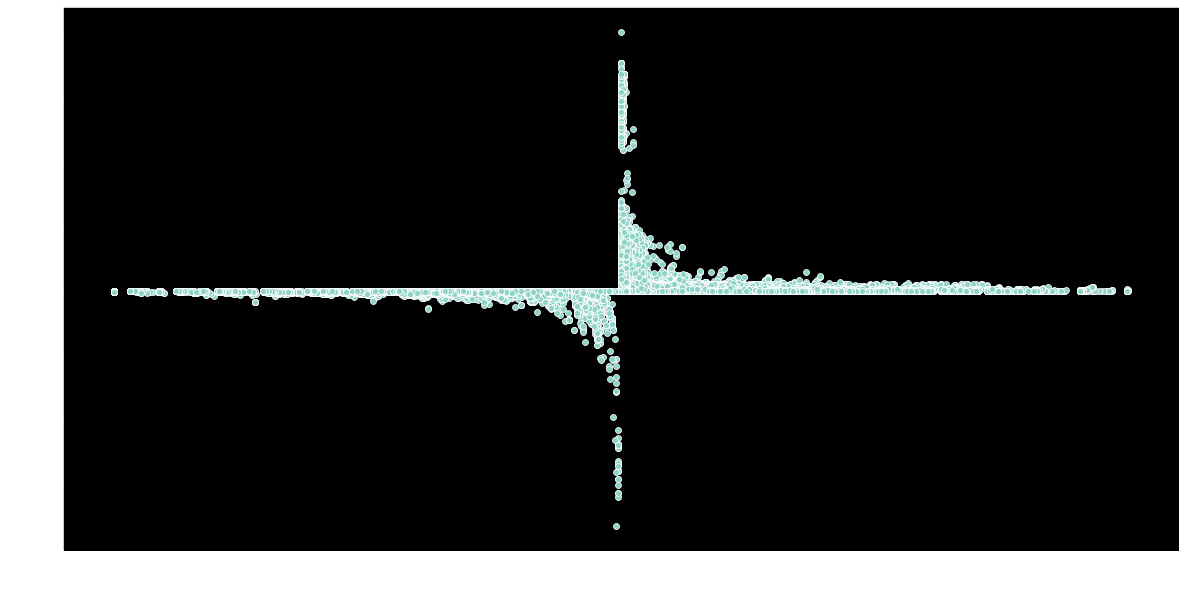

In [34]:
#scatterplot número de diárias e quantidade gasta 
#ax = fig.add_subplot()
plt.figure(figsize=(20,10))
sns.scatterplot(x="dias", y="custo_diaria", data=viagens_r)

In [39]:
#principais destinos
destino = viagens_r.groupby('Destinos').agg({'Situação' : 'count', 'Valor passagens' : 'sum'}).reset_index()
destino.nlargest(10, "Situação")

,Destinos,Situação,Valor passagens
9836,Informações protegidas por sigilo,63759,3.11e+07
3314,Brasília/DF,41039,6.05e+07
21199,São Paulo/SP,21284,1.81e+07
18210,Rio de Janeiro/RJ,18642,2.09e+07
19747,Sem informação,15453,1.50e+07
2381,Belo Horizonte/MG,9127,4.74e+06
17630,Recife/PE,7907,4.25e+06
6847,Curitiba/PR,7661,4.17e+06
20767,São José dos Campos/SP,6441,3.12e+06
16661,Porto Alegre/RS,5997,3.48e+06


In [42]:
#principais destinos
org_inf = viagens_r.groupby('Nome órgão solicitante').agg({'Situação' : 'count', 'Valor passagens' : 'sum'}).reset_index()

In [43]:
org_inf.nlargest(10, "Situação")

,Nome órgão solicitante,Situação,Valor passagens
18,Comando da Aeronáutica,42054,2.56e+07
139,Sem informação,39809,3.21e+07
29,Departamento de Polícia Federal,35061,1.54e+07
19,Comando do Exército,32323,1.53e+07
118,"Ministério da Agricultura, Pecuária e Abastecimento - Un...",26912,8.50e+06
30,Departamento de Polícia Rodoviária Federal,25581,1.17e+07
114,Instituto Nacional do Seguro Social,22611,4.96e+06
40,Fundação Instituto Brasileiro de Geografia e Estatística,19690,2.61e+06
128,Ministério da Saúde - Unidades com vínculo direto,18026,8.55e+06
70,Instituto Brasileiro do Meio Ambiente e dos Recursos Nat...,11495,5.39e+06
